In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import os,sys,glob, json
import _pickle as pkl
import dlab
from tqdm.notebook import tqdm
%matplotlib inline
%load_ext autoreload
%autoreload 2
plt.style.use('dark_background')


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
from moviepy.editor import *


In [3]:
from moviepy.editor import *

input_file = "path/to/your/file.avi"
output_file = "path/to/your/output/file.mp4"

clip = VideoFileClip(input_file)
clip.write_videofile(output_file)


OSError: MoviePy error: the file path/to/your/file.avi could not be found!
Please check that you entered the correct path.

In [ ]:
import matplotlib 
matplotlib.rcParams.update({'figure.max_open_warning': 0})

# Paths needed to be changed to your own paths

In [22]:
root_recording_folder ='/Volumes/T9/gradschool/rotations/jason_christie/sorted_recordings/test_2024-01-11_22-36-49_001'
frontCam_events_txt = r"/Volumes/T9/gradschool/rotations/jason_christie/sorted_recordings/test_2024-01-11_22-36-49_001/session002/20240111_christielab_session002_frontCam_events.txt"
frontCam_timestamps = r"/Volumes/T9/gradschool/rotations/jason_christie/sorted_recordings/test_2024-01-11_22-36-49_001/session002/20240111_christielab_session002_frontCam_timestamps.txt"
save_path_nwb = r"/Volumes/T9/gradschool/rotations/jason_christie/sorted_recordings/test_2024-01-11_22-36-49_001/test_nwbs"



In [23]:
recording_folder = root_recording_folder
stim_path = frontCam_events_txt
frame_path = frontCam_timestamps
nwb_path = save_path_nwb

### Load in raw recording data

In [24]:
recording_folder = recording_folder
# recording_folder = r'G:/Grant/rotation/2023-09-29_16-07-39_PaBont2'

experimenter = 'grh'
experiment_description= 'Chritie Lab, University of Colorado Anschutz. Test of reaching pertibation task. checking aligmnet of neural data with video data'

# #spikeglx
# probes = [os.path.basename(f) for f in np.sort(glob.glob(recording_folder+'/*-AP*'))]

probeids = ['A'] 
probedepths = [1500] 

### Read in .txt files with event times logged as frame numbers

In [25]:
stim_path = stim_path

# Create dictionaries to store the data
pellet_detected_data = {}
pellet_delivery_data = {}

# Open and read the text file
with open(stim_path, 'r') as file:
    lines = file.readlines()

# Iterate through the lines and parse the data
for line in lines:
    parts = line.strip().split('\t')
    if len(parts) == 2:
        name, value = parts
        value = int(value)
        if name == 'pellet_detected':
            if name in pellet_detected_data:
                pellet_detected_data[name].append(value)
            else:
                pellet_detected_data[name] = [value]
        elif name == 'pellet_delivery':
            if name in pellet_delivery_data:
                pellet_delivery_data[name].append(value)
            else:
                pellet_delivery_data[name] = [value]

pellet_detected_frame = pellet_detected_data['pellet_detected']
print("Pellet Detected Values:", pellet_detected_frame)
pellet_delivery_frame = pellet_delivery_data['pellet_delivery']
print("Pellet Delivery Values:", pellet_delivery_frame)


# Divide each value by 150
pellet_detected_seconds = [value / 150 for value in pellet_detected_frame]
pellet_delivery_seconds = [value / 150 for value in pellet_delivery_frame]
print('')
print('pellet detected real time seconds: ' , pellet_detected_seconds)
print('pellet delivery real time seconds: ' , pellet_delivery_seconds)


# Slow motion factor calculated from video. Because video is in slow motion need to convert times to match the video
slow_motion_factor = 4.994614744995619

pellet_delivery_slow_motion = [time * slow_motion_factor for time in pellet_detected_seconds]
pellet_detected_slow_motion = [time * slow_motion_factor for time in pellet_delivery_seconds]

print('')
print('pellet detected aligned to slow motion video: ' , pellet_detected_slow_motion)
print('pellet detected aligned to slow motion video: '  , pellet_delivery_slow_motion)
 
detected_slowmo_minutes_array = [seconds / 60 for seconds in pellet_detected_slow_motion]
delivery_slowmo_minutes_array = [seconds / 60 for seconds in pellet_delivery_slow_motion]

print('')
print('pellet detected aligned to slow motion video in minutes: ' , detected_slowmo_minutes_array)
print('pellet detected aligned to slow motion video in minutes: ' , delivery_slowmo_minutes_array)




Pellet Detected Values: [2794, 8193, 13643, 19090, 24548]
Pellet Delivery Values: [2845, 8230, 13681, 19144, 24587]

pellet detected real time seconds:  [18.626666666666665, 54.62, 90.95333333333333, 127.26666666666667, 163.65333333333334]
pellet delivery real time seconds:  [18.966666666666665, 54.86666666666667, 91.20666666666666, 127.62666666666667, 163.91333333333333]

pellet detected aligned to slow motion video:  [94.73119299675024, 274.037862342093, 455.5421621752338, 637.4460311879742, 818.6839515680485]
pellet detected aligned to slow motion video:  [93.03302398345173, 272.8058573716607, 454.2768597731682, 635.6479698797758, 817.3853517343498]

pellet detected aligned to slow motion video in minutes:  [1.578853216612504, 4.56729770570155, 7.59236936958723, 10.62410051979957, 13.644732526134142]
pellet detected aligned to slow motion video in minutes:  [1.5505503997241954, 4.546764289527678, 7.57128099621947, 10.594132831329597, 13.623089195572497]


### load in .txt file containing each frame number. stored as time between frame in nano-seconds

In [26]:
frame_path = frontCam_timestamps
# Initialize an empty list to store the numbers
frames = []

# Open and read the text file
with open(frame_path, 'r') as file:
    for line in file:
        number = int(line.strip())
        frames.append(number)

# Now, 'numbers' is a list containing all the numbers from the text file
print("Numbers Array:", frames)
print("total frames: ", len(frames))

# frame_numbers = [index + 1 for index in range(len(frames))]
frame_numbers = [(index + 1) / 150 for index in range(len(frames))]
frames_txt_file = [(index + 1) for index in range(len(frames))]



print('frame numbers: ', frame_numbers)
print('Recording Time Seconds:', len(frame_numbers)/150)
print('Recording Time Minutes:', len(frame_numbers)/150 / 60)





Numbers Array: [6667192, 6667000, 6666968, 6667784, 6667248, 6666672, 6667296, 6667032, 6667024, 6667976, 6666728, 6667512, 6667376, 6667384, 6666512, 6667408, 6667944, 6666944, 6667192, 6667000, 6667808, 6666464, 6667696, 6666784, 6667192, 6667920, 6666808, 6667248, 6667048, 6667976, 6667192, 6667296, 6666920, 6667456, 6667080, 6667568, 6666512, 6667544, 6666888, 6668080, 6667000, 6667248, 6666728, 6667488, 6667056, 6667808, 6667160, 6667000, 6667784, 6667192, 6666648, 6667888, 6667248, 6666784, 6667432, 6666944, 6667136, 6667944, 6666784, 6667464, 6666752, 6667520, 6666808, 6667592, 6667032, 6667080, 6667296, 6667432, 6667672, 6667384, 6667136, 6667536, 6666864, 6667192, 6666888, 6667464, 6667616, 6666704, 6667952, 6666488, 6667616, 6666784, 6667408, 6667024, 6667944, 6666952, 6666864, 6667752, 6666736, 6667264, 6668000, 6666432, 6668000, 6667112, 6667456, 6666680, 6667296, 6667864, 6666784, 6666920, 6667808, 6666624, 6667408, 6667296, 6667352, 6666944, 6667456, 6667056, 6667160, 666

### Plot the time between each frame, to see drop frames

total frame timestamps: 26879
recording duration seconds: 179.19333333333333


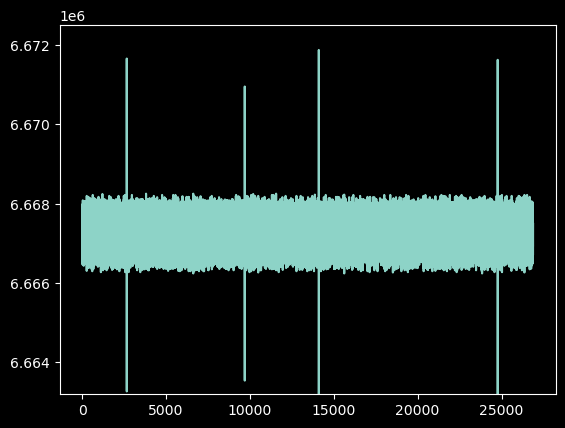

In [27]:
txt_file_frame_count = len(frames)
print("total frame timestamps:", txt_file_frame_count)
print("recording duration seconds:", txt_file_frame_count/150)
plt.ylim(6663200, 6672500)
plt.plot((frames))


### Load in the events data, logged in the digial lines of the openephys aquisition. and stored in the events folder of your recording

In [28]:
from open_ephys.analysis import Session

directory = recording_folder # for example
print(directory)

session = Session(directory)

/Volumes/T9/gradschool/rotations/jason_christie/sorted_recordings/test_2024-01-11_22-36-49_001


OSError: No available data format detected.

In [17]:
events_df = pd.DataFrame(session.recordnodes[0].recordings[0].events)#

NameError: name 'session' is not defined

In [18]:
events_df

NameError: name 'events_df' is not defined

In [19]:
session.recordnodes[0].recordings[0].events

NameError: name 'session' is not defined

### Verify all event types are being recorded

In [20]:
probeA_LFP = events_df[events_df.stream_name == 'ProbeA-LFP' ]
probeA_LFP

NameError: name 'events_df' is not defined

In [109]:
probeA_AP = events_df[events_df.stream_name == 'ProbeA-AP' ]
probeA_AP

NameError: name 'events_df' is not defined

In [110]:
ni_df = events_df[events_df.stream_name == 'PXIe-6341' ]
ni_df

NameError: name 'events_df' is not defined

### Sync pulse is recorded on digital line 7, every half second

In [111]:
ni_df[ni_df['line'] == 7]


NameError: name 'ni_df' is not defined

### SideCam Frame numbers are recorded in the events folder on digital line 8


In [112]:
frame_events = ni_df[ni_df['line'] == 8]
frame_events


NameError: name 'ni_df' is not defined

### using the number of rows recorded in the frame_events dataframe, we can calculate the total number of frames recorded, since each row is equivalent to one frame. we can use this to find total recording duration in seconds

In [95]:
row_numbers = np.arange(1, len(ni_df[ni_df['line'] == 8]) + 1)
open_ephys_frames = row_numbers
frames_in_seconds_open_ephys = np.array(row_numbers) / 150
frames_in_seconds_open_ephys[0:5]


array([0.00666667, 0.01333333, 0.02      , 0.02666667, 0.03333333])

### This shows the number of frames recoded by the camera in the open ephys. because the camera is recording at 150 fps, we can divide the frame number by 150 to get the time in seconds. and because i start the behavior camera and end the behvior camera begins after starting and ending the open ephys recording, there will be time in the open ephys recording before the frames start getting recorded.

In [96]:
open_ephys_frames_count = frame_events.shape[0]
print("number of frames recorded by open ephys:", open_ephys_frames_count)
print('number of frames recorded in txt file / total camera frames:', len(frames))

number of frames recorded by open ephys: 34348
number of frames recorded in txt file / total camera frames: 26879


In [97]:
extra_frames_counted_by_open_ephys =  open_ephys_frames_count - txt_file_frame_count
print("number of extra frames recorded by open-ephys:", extra_frames_counted_by_open_ephys)
print("seconds of extra frames recorded by open-ephys", extra_frames_counted_by_open_ephys/150)

number of extra frames recorded by open-ephys: 7469
seconds of extra frames recorded by open-ephys 49.79333333333334


### use the recorded frame event in the txt file and index into the corrisponding row of the frame_events dataframe and grab the time from the timestamp column. this gived you the aligned time in which the event occured, meaning you can use that time to plot the data, because it is syncronized with the neuropixel clocks

In [98]:
print("Pellet Detected frame number:", pellet_detected_frame)
print("Pellet Delivery frame number:", pellet_delivery_frame)

print('')


# Create new arrays to store the extracted timestamps
detected_timestamps = []
delivery_timestamps = []
# Iterate through the frames in the 'pellet_detected_frame' array
for frame in pellet_detected_frame:
    # Use the frame value as an index to select the corresponding row
    selected_row = frame_events.iloc[frame]
    timestamp = selected_row['timestamp']
    detected_timestamps.append(timestamp)

# Iterate through the frames in the 'pellet_delivery_frame' array
for frame in pellet_delivery_frame:
    # Use the frame value as an index to select the corresponding row
    selected_row = frame_events.iloc[frame]
    timestamp = selected_row['timestamp']
    delivery_timestamps.append(timestamp)

# Now, 'detected_timestamps' and 'delivery_timestamps' contain the extracted timestamps
print("Pellet Detected Timestamps:", detected_timestamps)
print("Pellet Delivery Timestamps:", delivery_timestamps)



Pellet Detected frame number: [2794, 8193, 13643, 19090, 24548]
Pellet Delivery frame number: [2845, 8230, 13681, 19144, 24587]

Pellet Detected Timestamps: [70.76886666666667, 106.76843333333333, 143.1081, 179.4278, 215.8208]
Pellet Delivery Timestamps: [71.10890462948598, 107.01516666666667, 143.36146666666667, 179.78787837160667, 216.0808]


In [99]:
# # Divide each value by 150
# pellet_detected_seconds = [value / 150 for value in pellet_detected_frame_new]
# pellet_delivery_seconds = [value / 150 for value in pellet_delivery_frame_new]

# print("pellet_detected_seconds: ", pellet_detected_seconds)
# print("pellet_delivery_seconds: ", pellet_delivery_seconds)

# These are the aligned timestamps of the pellet detected and pellet delivery events
### use these when plotting neural data

In [100]:
# event_times_pellet_detetced = frame_events['timestamp'].iloc[pellet_detected_frame_new]
# print(event_times_pellet_detetced)

# event_times_pellet_delivery = frame_events['timestamp'].iloc[pellet_delivery_frame_new]
# event_times_pellet_delivery

### Plot the digital line inputs

In [101]:
ni_ts = {}
df_up = ni_df[ni_df.state==1]
for ch in ni_df.line.unique():
    ni_ts[ch] = df_up[df_up.line == ch].timestamp

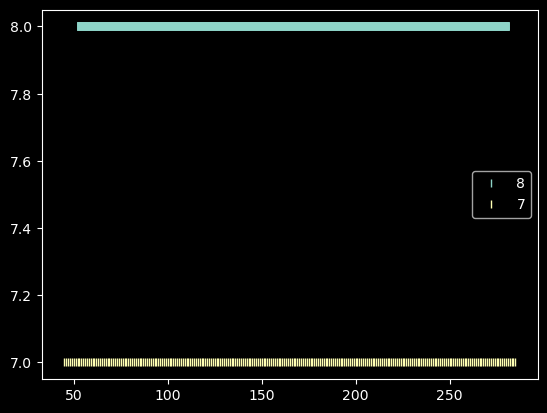

In [102]:
for ch in ([8,7]):
    # plt.xlim(65,75)
    plt.plot(np.array(ni_ts[ch]),
             np.ones(len(ni_ts[ch]))*ch,
             '|',label=ch)
plt.legend()


In [103]:
# Convert the values to float
pellet_detected_frame = [float(frame) for frame in pellet_detected_frame]
pellet_delivery_frame = [float(frame) for frame in pellet_delivery_frame]


In [104]:
detected_timestamps


[70.76886666666667, 106.76843333333333, 143.1081, 179.4278, 215.8208]

In [105]:
delivery_timestamps

[71.10890462948598,
 107.01516666666667,
 143.36146666666667,
 179.78787837160667,
 216.0808]

In [106]:
pellet_delivery_seconds

[18.966666666666665,
 54.86666666666667,
 91.20666666666666,
 127.62666666666667,
 163.91333333333333]

In [107]:
pellet_detected_seconds

[18.626666666666665,
 54.62,
 90.95333333333333,
 127.26666666666667,
 163.65333333333334]

In [15]:
detected_baseline = pellet_detected_seconds[0:2]
detected_perturbation = pellet_detected_seconds[2:4]
detected_washout = pellet_detected_seconds[4:6]
print(detected_baseline, detected_perturbation, detected_washout)

pellet_detected_slow_motion_baseline = pellet_detected_slow_motion[0:2] 
pellet_detected_slow_motion_perturbation = pellet_detected_slow_motion[2:4]
pellet_detected_slow_motion_washout = pellet_detected_slow_motion[4:6]
print(pellet_detected_slow_motion_baseline, pellet_detected_slow_motion_perturbation, pellet_detected_slow_motion_washout)



[18.626666666666665, 54.62] [90.95333333333333, 127.26666666666667] [163.65333333333334]
[94.73119299675024, 274.037862342093] [455.5421621752338, 637.4460311879742] [818.6839515680485]


In [16]:
delivery_baseline = pellet_delivery_seconds[0:2]
delivery_perturbation = pellet_delivery_seconds[2:4]
delivery_washout = pellet_delivery_seconds[4:6]
print(delivery_baseline, delivery_perturbation, delivery_washout)

pellet_delivery_slow_motion_baseline = pellet_delivery_slow_motion[0:2]
pellet_delivery_slow_motion_perturbation = pellet_delivery_slow_motion[2:4]
pellet_delivery_slow_motion_washout = pellet_delivery_slow_motion[4:6]
pellet_delivery_slow_motion_baseline, pellet_delivery_slow_motion_perturbation, pellet_delivery_slow_motion_washout

[18.966666666666665, 54.86666666666667] [91.20666666666666, 127.62666666666667] [163.91333333333333]


([93.03302398345173, 272.8058573716607],
 [454.2768597731682, 635.6479698797758],
 [817.3853517343498])

In [17]:
stimuli_times = {'pellet_detected_baseline':detected_baseline,
                'pellet_delivery_baseline':delivery_baseline,
                'pellet_detected_perturbation':detected_perturbation,
                'pellet_delivery_perturbation':delivery_perturbation,
                'pellet_detected_washout':detected_washout,
                'pellet_delivery_washout':delivery_washout,
                'pellet_detected_slow_motion_baseline':pellet_delivery_slow_motion_baseline,
                'pellet_detected_slow_motion_perturbation':pellet_delivery_slow_motion_perturbation,
                'pellet_detected_slow_motion_washout':pellet_delivery_slow_motion_washout,
                'all_frames_sideCam':frame_numbers,
                'frames_in_seconds_openEphys':frames_in_seconds_open_ephys,

                  }




NameError: name 'frames_in_seconds_open_ephys' is not defined

### Conver values to floats, for code to work, idk why

In [111]:
# Convert the 'frames' values to float
stimuli_times['all_frames_sideCam'] = [float(frame) for frame in stimuli_times['all_frames_sideCam']]


# Now, the 'frames' values are in float format
print(stimuli_times['all_frames_sideCam'])

[0.006666666666666667, 0.013333333333333334, 0.02, 0.02666666666666667, 0.03333333333333333, 0.04, 0.04666666666666667, 0.05333333333333334, 0.06, 0.06666666666666667, 0.07333333333333333, 0.08, 0.08666666666666667, 0.09333333333333334, 0.1, 0.10666666666666667, 0.11333333333333333, 0.12, 0.12666666666666668, 0.13333333333333333, 0.14, 0.14666666666666667, 0.15333333333333332, 0.16, 0.16666666666666666, 0.17333333333333334, 0.18, 0.18666666666666668, 0.19333333333333333, 0.2, 0.20666666666666667, 0.21333333333333335, 0.22, 0.22666666666666666, 0.23333333333333334, 0.24, 0.24666666666666667, 0.25333333333333335, 0.26, 0.26666666666666666, 0.2733333333333333, 0.28, 0.2866666666666667, 0.29333333333333333, 0.3, 0.30666666666666664, 0.31333333333333335, 0.32, 0.32666666666666666, 0.3333333333333333, 0.34, 0.3466666666666667, 0.35333333333333333, 0.36, 0.36666666666666664, 0.37333333333333335, 0.38, 0.38666666666666666, 0.3933333333333333, 0.4, 0.4066666666666667, 0.41333333333333333, 0.42,

In [112]:
# Convert the 'frames' values to float
stimuli_times['pellet_delivery_sideCam_frame_number'] = [float(frame) for frame in stimuli_times['pellet_delivery_sideCam_frame_number']]


# Now, the 'frames' values are in float format
print(stimuli_times['pellet_delivery_sideCam_frame_number'])

KeyError: 'pellet_delivery_sideCam_frame_number'

In [113]:


#stimulus list
stimuli = {'none': None,
           } 

## Assemble NWB

In [114]:
# !pip install pynwb

In [115]:
import pynwb
from hdmf.backends.hdf5.h5_utils import H5DataIO
from hdmf.utils import StrDataset

In [116]:
from datetime import datetime
from dateutil.tz import tzlocal
from pynwb import NWBFile

nwbfile = NWBFile('Reaching Pertibation Task, Christie Lab, University of Colorado Anschutz. Test of reaching pertibation task. checking aligmnet of neural data with video data', 
                  recording_folder, 
                  datetime.now(tzlocal()),
                  experimenter=experimenter,
                  lab='Christie Lab',
                  institution='University of Colorado',
                  experiment_description=experiment_description,
                  session_id=os.path.basename(recording_folder))

add stimulus information

In [117]:
for stim in stimuli_times.keys():
    nwbfile.add_epoch(np.array(stimuli_times[stim])[0], 
                      np.array(stimuli_times[stim])[-1]+3.,
                      [stim])

In [118]:
nwbfile

root pynwb.file.NWBFile at 0x140478860705264
Fields:
  epoch_tags: {
    all_frames_sideCam,
    frames_in_seconds_openEphys,
    pellet_delivery_baseline,
    pellet_delivery_perturbation,
    pellet_delivery_washout,
    pellet_detected_baseline,
    pellet_detected_perturbation,
    pellet_detected_washout
  }
  epochs: epochs <class 'pynwb.epoch.TimeIntervals'>
  experiment_description: Chritie Lab, University of Colorado Anschutz. Test of reaching pertibation task. checking aligmnet of neural data with video data
  experimenter: ['grh']
  file_create_date: [datetime.datetime(2024, 1, 12, 10, 44, 42, 414779, tzinfo=tzlocal())]
  identifier: /Volumes/T9/gradschool/rotations/jason_christie/sorted_recordings/test_2024-01-11_22-36-49_001
  institution: University of Colorado
  lab: Christie Lab
  session_description: Reaching Pertibation Task, Christie Lab, University of Colorado Anschutz. Test of reaching pertibation task. checking aligmnet of neural data with video data
  session_id:

In [119]:
nwbfile.add_trial_column('stimulus', 'the event occuring during this trial')

#optogenetic pertibation
nwbfile.add_trial_column('optogenetics_LED_state', 'whether or not the LED was on or off for this trial. 1=on,0=off. exact opto times are available in optogenetics_states field of NWB')


#arbMatrix and scene flicker
# nwbfile.add_trial_column('stimulus_index', 'index of each trial into a matrix or list of images')

stim_vals = {'optogenetics_LED_state':-1,
       
}

stim = 'pellet_detected_baseline'
for i,trial_start in enumerate(np.array(stimuli_times[stim])):
    nwbfile.add_trial(start_time=trial_start, stop_time=trial_start, stimulus=stim,
                     optogenetics_LED_state=0,
                 

                     )
    

stim = 'pellet_detected_perturbation'
for i,trial_start in enumerate(np.array(stimuli_times[stim])):
    nwbfile.add_trial(start_time=trial_start, stop_time=trial_start, stimulus=stim,
                     optogenetics_LED_state=1,

                     )
    
stim = 'pellet_detected_washout'
for i,trial_start in enumerate(np.array(stimuli_times[stim])):
    nwbfile.add_trial(start_time=trial_start,  stop_time=trial_start, stimulus=stim,
                     optogenetics_LED_state=0,

                     )
    


stim = 'pellet_delivery_baseline'
for i,trial_start in enumerate(np.array(stimuli_times[stim])):
    nwbfile.add_trial(start_time=trial_start, stop_time=trial_start, stimulus=stim,
                     optogenetics_LED_state=0,
                 

                     )
    

stim = 'pellet_delivery_perturbation'
for i,trial_start in enumerate(np.array(stimuli_times[stim])):
    nwbfile.add_trial(start_time=trial_start, stop_time=trial_start, stimulus=stim,
                     optogenetics_LED_state=1,

                     )
    
stim = 'pellet_delivery_washout'
for i,trial_start in enumerate(np.array(stimuli_times[stim])):
    nwbfile.add_trial(start_time=trial_start,  stop_time=trial_start, stimulus=stim,
                     optogenetics_LED_state=0,

                     )
    
    
    
stim = 'all_frames_sideCam'
for i,trial_start in enumerate(np.array(stimuli_times[stim])):
    nwbfile.add_trial(start_time=trial_start,  stop_time=trial_start, stimulus=stim,
                     optogenetics_LED_state=0,

                     )
    
    
stim = 'frames_in_seconds_openEphys'
for i,trial_start in enumerate(np.array(stimuli_times[stim])):
    nwbfile.add_trial(start_time=trial_start,  stop_time=trial_start, stimulus=stim,
                     optogenetics_LED_state=0,

                     )

## Check the trials dataframe

In [120]:
df = nwbfile.trials.to_dataframe()

In [121]:
df

,start_time,stop_time,stimulus,optogenetics_LED_state
id,,,,
0,18.626667,18.626667,pellet_detected_baseline,0
1,54.620000,54.620000,pellet_detected_baseline,0
2,90.953333,90.953333,pellet_detected_perturbation,1
3,127.266667,127.266667,pellet_detected_perturbation,1
4,163.653333,163.653333,pellet_detected_washout,0
...,...,...,...,...
61232,228.960000,228.960000,frames_in_seconds_openEphys,0
61233,228.966667,228.966667,frames_in_seconds_openEphys,0
61234,228.973333,228.973333,frames_in_seconds_openEphys,0


In [122]:
base_df = df[df['stimulus'] == 'pellet_detected_baseline']
detected_pert_df = df[df['stimulus'] == 'pellet_detected_perturbation']
wash_df = df[df['stimulus'] == 'pellet_detected_washout']


base_df, detected_pert_df, wash_df

(    start_time  stop_time                  stimulus  optogenetics_LED_state
 id                                                                         
 0    18.626667  18.626667  pellet_detected_baseline                       0
 1    54.620000  54.620000  pellet_detected_baseline                       0,
     start_time   stop_time                      stimulus  \
 id                                                         
 2    90.953333   90.953333  pellet_detected_perturbation   
 3   127.266667  127.266667  pellet_detected_perturbation   
 
     optogenetics_LED_state  
 id                          
 2                        1  
 3                        1  ,
     start_time   stop_time                 stimulus  optogenetics_LED_state
 id                                                                         
 4   163.653333  163.653333  pellet_detected_washout                       0)

In [123]:
base_df = df[df['stimulus'] == 'pellet_delivery_baseline']
delivery_pert_df = df[df['stimulus'] == 'pellet_delivery_perturbation']
wash_df = df[df['stimulus'] == 'pellet_delivery_washout']


base_df, delivery_pert_df, wash_df

(    start_time  stop_time                  stimulus  optogenetics_LED_state
 id                                                                         
 5    18.966667  18.966667  pellet_delivery_baseline                       0
 6    54.866667  54.866667  pellet_delivery_baseline                       0,
     start_time   stop_time                      stimulus  \
 id                                                         
 7    91.206667   91.206667  pellet_delivery_perturbation   
 8   127.626667  127.626667  pellet_delivery_perturbation   
 
     optogenetics_LED_state  
 id                          
 7                        1  
 8                        1  ,
     start_time   stop_time                 stimulus  optogenetics_LED_state
 id                                                                         
 9   163.913333  163.913333  pellet_delivery_washout                       0)

## add optogenetics

In [124]:
delivery_pert_df
opto_on_times = delivery_pert_df['start_time'].to_numpy()
opto_off_times = [value + 0.1 for value in opto_on_times]

opto_on_times, opto_off_times


(array([ 91.20666667, 127.62666667]), [91.30666666666666, 127.72666666666666])

In [125]:
# frame_events 

# opto_off_times = detected_pert_df[camera_df.state==0].timestamp
# opto_on_times = camera_df[camera_df.state==1].timestamp

In [126]:
opto_states = pynwb.epoch.TimeIntervals(
    name="optogenetics_states",
    description="intervals for optical fiber, fiber at power = ?? on what system. fiber 470nm, ",
)

opto_states.add_column(name="power", description="15mW")
opto_states.add_column(name="wavelength", description="470nm")

for i in range(np.array(opto_off_times).shape[0]):
    opto_states.add_row(start_time=np.array(opto_on_times)[i], stop_time=np.array(opto_off_times)[i], power=1.5, wavelength=565)

nwbfile.add_time_intervals(opto_states)

optogenetics_states pynwb.epoch.TimeIntervals at 0x140478591378288
Fields:
  colnames: ['start_time' 'stop_time' 'power' 'wavelength']
  columns: (
    start_time <class 'hdmf.common.table.VectorData'>,
    stop_time <class 'hdmf.common.table.VectorData'>,
    power <class 'hdmf.common.table.VectorData'>,
    wavelength <class 'hdmf.common.table.VectorData'>
  )
  description: intervals for optical fiber, fiber at power = ?? on what system. fiber 470nm, 
  id: id <class 'hdmf.common.table.ElementIdentifiers'>

### add ephys data
first add electrodes and raw data link

In [127]:
from dlab.nwbtools import df_from_phy, load_phy_template, option234_positions, multi_load_unit_data


In [139]:
data = np.load('/Volumes/T9/gradschool/rotations/jason_christie/sorted_recordings/test_2024-01-11_22-36-49_001/Record_Node_103/experiment1/recording1/continuous/Neuropix-PXI-100.ProbeA-AP/spike_times.npy')
print(data)

[[   4938]
 [   5295]
 [  11870]
 ...
 [7245605]
 [7245750]
 [7247290]]


In [128]:
recording_folder = root_recording_folder
recording_folder

'/Volumes/T9/gradschool/rotations/jason_christie/sorted_recordings/test_2024-01-11_22-36-49_001'

In [29]:
folder_paths = glob.glob(os.path.join(recording_folder,'*imec*'))
print(folder_paths)  # Add this line to debug


[autoreload of numpy failed: Traceback (most recent call last):
  File "/Users/grant/opt/anaconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 273, in check
    superreload(m, reload, self.old_objects)
  File "/Users/grant/opt/anaconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 471, in superreload
    module = reload(module)
  File "/Users/grant/opt/anaconda3/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 850, in exec_module
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "/Users/grant/opt/anaconda3/lib/python3.9/site-packages/numpy/__init__.py", line 376, in <module>
    _mac_os_check()
  File "/Users/grant/opt/anaconda3/lib/python3.9/site-packages/numpy/__init__.py", line 370, in _mac_os_check
    _ = polyfit(x, y, 2, cov=True)
  File "<__ar

[]


In [129]:
df_units = multi_load_unit_data(recording_folder,probe_depths=probedepths)
df_units.iloc[0]

ValueError: No objects to concatenate

# Do not RUN code bellow, Makes random spike times

In [181]:

# Function to generate random spike times
def generate_random_spike_times():
    return np.sort(np.random.uniform(0, 3, 5000))

# Create a new DataFrame to hold the expanded spike times
expanded_spike_times = pd.DataFrame({'times': [generate_random_spike_times() for _ in range(len(df_units))]})

# Now, you can replace the 'spike_times' column in your original DataFrame with the expanded_spike_times
df_units['times'] = expanded_spike_times['times']
df_units.iloc[-1].times[50:70]

array([0.03493282, 0.03626506, 0.03631804, 0.03662466, 0.03729274,
       0.03775943, 0.03815653, 0.03879792, 0.03886765, 0.03930825,
       0.03967616, 0.04025763, 0.04074288, 0.04082164, 0.04244495,
       0.04283623, 0.04325788, 0.04395038, 0.04438071, 0.04444551])

# Do not RUN code above, Makes random spike times

In [182]:
probes = ['A']
locations = ['M1']
descriptions = ['Neuropixels1.0'] 

In [183]:
device = nwbfile.create_device(name='ChristieLab Rig_2')

for i, probe in enumerate(probes):
    electrode_name = 'probe'+str(i)
    description = descriptions[i]
    location = locations[i]

    electrode_group = nwbfile.create_electrode_group(electrode_name,
                                                     description=description,
                                                     location=location,
                                                     device=device)
    for ch in range(option234_positions.shape[0]):
        nwbfile.add_electrode(x=option234_positions[ch,0],y=0.,z=option234_positions[0,1],imp=0.0,location='none',filtering='high pass 300Hz',group=electrode_group)
    
#     if len(glob.glob(os.path.join(recording_folder,probes[1])+'/*lf.b*')) > 0:
#         ephys_ts = pynwb.ecephys.ElectricalSeries('lfp_probe'+probeids[i],
#                                 data=H5DataIO(data=StrDataset(glob.glob(os.path.join(recording_folder,probes[1])+'/*lf.b*')[0]),    
#                                         link_data=True),
#                                 electrodes = electrode_group,
#                                 starting_time=0,
#                                 rate=2500,
#                                 resolution=0.001,
#                                 comments="V1, depth = 1500um",
#                                 description="V1, depth = 1500um")
#         nwbfile.add_acquisition(ephys_ts)

In [184]:
nwbfile

root pynwb.file.NWBFile at 0x2084002898512
Fields:
  devices: {
    ChristieLab Rig_2 <class 'pynwb.device.Device'>
  }
  electrode_groups: {
    probe0 <class 'pynwb.ecephys.ElectrodeGroup'>
  }
  electrodes: electrodes <class 'hdmf.common.table.DynamicTable'>
  epoch_tags: {
    all_frames_sideCam,
    frames_in_seconds_openEphys,
    pellet_delivery_baseline,
    pellet_delivery_perturbation,
    pellet_delivery_washout,
    pellet_detected_baseline,
    pellet_detected_perturbation,
    pellet_detected_washout
  }
  epochs: epochs <class 'pynwb.epoch.TimeIntervals'>
  experiment_description: Chritie Lab, University of Colorado Anschutz. Test of reaching pertibation task. checking aligmnet of neural data with video data
  experimenter: ['grh']
  file_create_date: [datetime.datetime(2024, 1, 8, 17, 48, 22, 49971, tzinfo=tzlocal())]
  identifier: G:\Grant\jason_christie\sorted_recordings\test_2024-01-07_21-27-07_001
  institution: University of Colorado
  intervals: {
    optogenetics_states <class 'pynwb.epoch.TimeIntervals'>
  }
  lab: Christie Lab
  session_description: Reaching Pertibation Task, Christie Lab, University of Colorado Anschutz. Test of reaching pertibation task. checking aligmnet of neural data with video data
  session_id: test_2024-01-07_21-27-07_001
  session_start_time: 2024-01-08 17:48:22.049971-07:00
  timestamps_reference_time: 2024-01-08 17:48:22.049971-07:00
  trials: trials <class 'pynwb.epoch.TimeIntervals'>

In [185]:
# nwbfile.add_unit_column('location', 'the anatomical location of this unit')
# nwbfile.add_unit_column('quality', 'the quality for the inference of this unit')
# nwbfile.add_unit_column('quality_ISIviolations', 'the quality for the inference of this unit')
# nwbfile.add_unit_column('quality_sn', 'the quality for the inference of this unit')
# nwbfile.add_unit_column('quality_distance', 'the quality for the inference of this unit')

nwbfile.add_unit_column('depth', 'the depth of this unit from the pia')
nwbfile.add_unit_column('xpos', 'the x position on probe')
nwbfile.add_unit_column('ypos', 'the y position on probe')
# nwbfile.add_unit_column('template', 'Kilosort template')
nwbfile.add_unit_column('label', 'user label')
nwbfile.add_unit_column('KSlabel', 'Kilosort label')
nwbfile.add_unit_column('KSamplitude', 'Kilosort amplitude')
nwbfile.add_unit_column('KScontamination', 'Kilosort ISI contamination')
nwbfile.add_unit_column('probe', 'probe ID')

labels =np.array(['noise','mua','good'])

for i,unit_row in df_units.iterrows():
    try: lbl = np.argwhere(unit_row.group==labels)[0][0]
    except: lbl=0
    try: klbl = np.argwhere(unit_row.KSlabel==labels)[0][0]
    except: klbl=0
    nwbfile.add_unit(id=int(unit_row.name), 
                     spike_times=unit_row.times,
                    #  electrodes = np.where(unit_row.waveform_weights > 0)[0],
                    #  waveform_mean = unit_row.template,
# #                       quality=0.95
                     depth = unit_row.depth,
                     xpos= unit_row.xpos,
                     ypos= unit_row.zpos,
#                      # template= unit_row.template,
                     label= lbl,
                     KSlabel= klbl,
                     KSamplitude= unit_row.KSamplitude,
                     KScontamination= unit_row.KScontamination,
                     probe= unit_row.probe,
                    )

In [186]:
# nwb_path = r'C://Users//denmanlab//Desktop//eOPN3_33_nwb.nwb'
nwb_path = save_path_nwb

with pynwb.NWBHDF5IO(nwb_path, 'w') as io:
    io.write(nwbfile)

# Load data

In [187]:
nwb = h5py.File(nwb_path,'r')

In [188]:
nwb

<HDF5 file "test_2024-01-07_21-27-07_002" (mode r)>

# browse with NWBwidget

In [189]:
!pip install nwbwidgets

In [190]:
from pynwb import NWBHDF5IO
from nwbwidgets import nwb2widget

In [191]:
io = NWBHDF5IO(nwb_path, mode='r')
nwb_ = io.read()

nwb2widget(nwb_)

In [192]:
df_stim = nwb_.trials.to_dataframe()
df_opto = nwb_.get_time_intervals('optogenetics_states').to_dataframe()
df_units = nwb_.units.to_dataframe()

In [193]:
optogenetics_LED_state = []
for i,row in df_stim.iterrows():
    if np.min(np.abs(df_opto.start_time.values - row.start_time))<0.1:
        optogenetics_LED_state.extend([1])
    else:
        optogenetics_LED_state.extend([0])
df_stim['optogenetics_LED_state']= optogenetics_LED_state

## flash responses 
[no probes in this nwb yet having data issue with my local copy]

In [194]:
import dlab.psth_and_raster as psth
from dlab.generalephys import cleanAxes
df1=df_units
df1

,depth,xpos,ypos,label,KSlabel,KSamplitude,KScontamination,probe,spike_times
id,,,,,,,,,
0,1328.257815,29.080078,3668.257815,2,1,378.6,100.0,A,"[0.0003066798166591056, 0.002482859475526955, ..."
1,NaN,NaN,NaN,2,1,NaN,100.0,A,"[0.0001537741134487458, 0.00033622844057779044..."
2,NaN,NaN,NaN,2,1,363.6,inf,A,"[1.2650599813035512e-05, 0.0003223317453892038..."
3,NaN,NaN,NaN,2,1,469.6,0.0,A,"[0.0005974803039474619, 0.001406582912002352, ..."


In [360]:
df_stim

,start_time,stop_time,stimulus,optogenetics_LED_state
id,,,,
0,8.906667,8.906667,pellet_detected_seconds,0
1,43.433333,43.433333,pellet_detected_seconds,0
2,77.880000,77.880000,pellet_detected_seconds,0
3,97.300000,97.300000,pellet_detected_seconds,0
4,131.660000,131.660000,pellet_detected_seconds,0
...,...,...,...,...
72756,237.986667,237.986667,frames_in_seconds_openEphys,0
72757,237.993333,237.993333,frames_in_seconds_openEphys,0
72758,238.000000,238.000000,frames_in_seconds_openEphys,0


plot one unit
### label==2 "good"
### label==1 "mua"
### label==0 'noise'

In [196]:
df_units[df_units.probe=='A'][df_units.label==2] # these are the "good" labelled units

,depth,xpos,ypos,label,KSlabel,KSamplitude,KScontamination,probe,spike_times
id,,,,,,,,,
0,1328.257815,29.080078,3668.257815,2,1,378.6,100.0,A,"[0.0003066798166591056, 0.002482859475526955, ..."
1,NaN,NaN,NaN,2,1,NaN,100.0,A,"[0.0001537741134487458, 0.00033622844057779044..."
2,NaN,NaN,NaN,2,1,363.6,inf,A,"[1.2650599813035512e-05, 0.0003223317453892038..."
3,NaN,NaN,NaN,2,1,469.6,0.0,A,"[0.0005974803039474619, 0.001406582912002352, ..."


In [195]:
df_units[df_units.probe=='B'][df_units.label==2] # these are the "good" labelled units

C:\Users\denmanlab\AppData\Local\Temp\ipykernel_21856\4126575258.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_units[df_units.probe=='B'][df_units.label==2] # these are the "good" labelled units


,depth,xpos,ypos,label,KSlabel,KSamplitude,KScontamination,probe,spike_times
id,,,,,,,,,


In [197]:
df_units[df_units.probe=='C'][df_units.label==2] # these are the "good" labelled units

C:\Users\denmanlab\AppData\Local\Temp\ipykernel_21856\2433156616.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_units[df_units.probe=='C'][df_units.label==2] # these are the "good" labelled units


,depth,xpos,ypos,label,KSlabel,KSamplitude,KScontamination,probe,spike_times
id,,,,,,,,,


# .values[::2]
### is Equal too the brightdark flashes

IndexError: index 0 is out of bounds for axis 0 with size 0

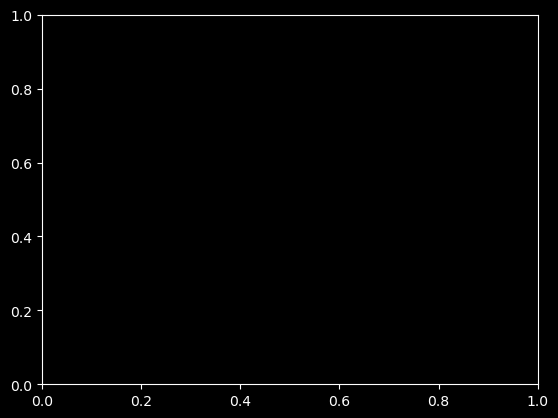

In [198]:
unit=869
df1 = df_units[df_units.probe=='A'][df_units.label==2]
f,ax=plt.subplots(1,1)
psth.psth_line(times=df1[df1.index==unit].spike_times.values[0],
         triggers=df_stim[(df_stim.stimulus=='luminance_flash') & (df_stim.optogenetics_LED_state == 0)].start_time.values[::2],
              ymax=60,binsize=0.05,axes=ax,color='#487697')
psth.psth_line(times=df1[df1.index==unit].spike_times.values[0],
         triggers=df_stim[(df_stim.stimulus=='luminance_flash_opto') ].start_time.values[::2],
              ymax=60,binsize=0.05,axes=ax,color='#ffaa00')
plt.tight_layout()
# f.savefig('/Users/danieljdenman/Academics/grants/applications/20230305_R01_NEI_resub/figures/eArch_LM_psth.eps')
# f.savefig('/Users/danieljdenman/Academics/grants/applications/20230305_R01_NEI_resub/figures/eArch_LM_psth.png')

f,ax=plt.subplots(2,1)
psth.raster(times=df1[df1.index==unit].spike_times.values[0],
         triggers=df_stim[(df_stim.stimulus=='luminance_flash') & (df_stim.optogenetics_LED_state == 0)].start_time.values[::2],
              axes=ax[0],color='#487697',timeDomain=True,post=1.5,ms=8)
psth.raster(times=df1[df1.index==unit].spike_times.values[0],
         triggers=df_stim[(df_stim.stimulus=='luminance_flash_opto') ].start_time.values[::2],
              axes=ax[1],color='#ffaa00',timeDomain=True,post=1.5,ms=8)
for ax_ in ax: ax_.set_xlim(-0.5,1.0)
plt.tight_layout()
# f.savefig('/Users/danieljdenman/Academics/grants/applications/20230305_R01_NEI_resub/figures/eArch_LM_raster.eps')

# .values[1::2]
### is Equal too the dark flashes

In [201]:
df_stim

,start_time,stop_time,stimulus,optogenetics_LED_state
id,,,,
0,33.866667,33.866667,pellet_detected_baseline,0
1,68.406667,68.406667,pellet_detected_baseline,0
2,87.660000,87.660000,pellet_detected_perturbation,0
3,121.840000,121.840000,pellet_detected_perturbation,0
4,156.620000,156.620000,pellet_detected_washout,0
...,...,...,...,...
69841,232.826667,232.826667,frames_in_seconds_openEphys,0
69842,232.833333,232.833333,frames_in_seconds_openEphys,0
69843,232.840000,232.840000,frames_in_seconds_openEphys,0


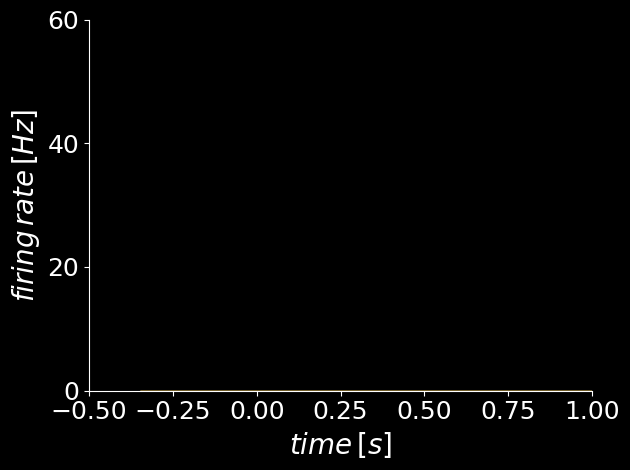

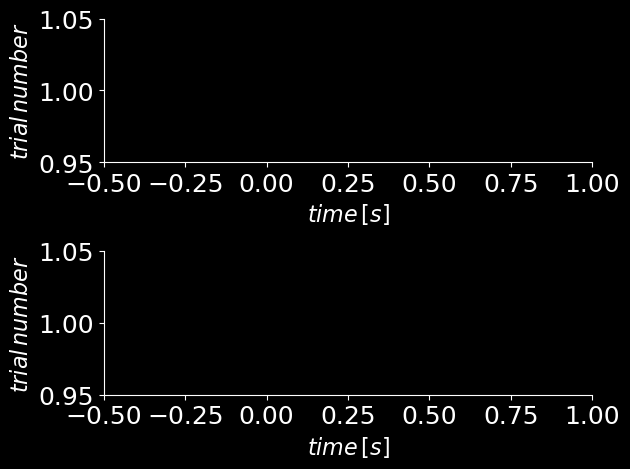

In [206]:
unit=1
df1 = df_units[df_units.probe=='A'][df_units.label==2]
f,ax=plt.subplots(1,1)
psth.psth_line(times=df1[df1.index==unit].spike_times.values[0],
         triggers=df_stim[(df_stim.stimulus=='pellet_detected_baseline') & (df_stim.optogenetics_LED_state == 0)].start_time.values[1::2],
              ymax=60,binsize=0.05,axes=ax,color='#487697')
psth.psth_line(times=df1[df1.index==unit].spike_times.values[0],
         triggers=df_stim[(df_stim.stimulus=='pellet_detected_perturbation') ].start_time.values[1::2],
              ymax=60,binsize=0.05,axes=ax,color='#ffaa00')
plt.tight_layout()
# f.savefig('/Users/danieljdenman/Academics/grants/applications/20230305_R01_NEI_resub/figures/eArch_LM_psth.eps')
# f.savefig('/Users/danieljdenman/Academics/grants/applications/20230305_R01_NEI_resub/figures/eArch_LM_psth.png')

f,ax=plt.subplots(2,1)
psth.raster(times=df1[df1.index==unit].spike_times.values[0],
         triggers=df_stim[(df_stim.stimulus=='pellet_detected_baseline') & (df_stim.optogenetics_LED_state == 0)].start_time.values[1::2],
              axes=ax[0],color='#487697',timeDomain=True,post=1.5,ms=8)
psth.raster(times=df1[df1.index==unit].spike_times.values[0],
         triggers=df_stim[(df_stim.stimulus=='pellet_detected_perturbation') ].start_time.values[1::2],
              axes=ax[1],color='#ffaa00',timeDomain=True,post=1.5,ms=8)
for ax_ in ax: ax_.set_xlim(-0.5,1.0)
plt.tight_layout()
# f.savefig('/Users/danieljdenman/Academics/grants/applications/20230305_R01_NEI_resub/figures/eArch_LM_raster.eps')